In [58]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,Dropout
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re


# Load Dataset

In [59]:
column_names = ['sentiment', 'text']
data = pd.read_csv("pos-neg-food.csv",names = column_names)
data

,sentiment,text
0,pos,I got the best service from them.
1,pos,Very impressive service for the customers. I l...
2,pos,"Never had any issues with their delivery, alwa..."
3,pos,Great Service Pre-Order option is great. Lovin...
4,pos,Delivery service at its best....
...,...,...
562,neg,Food is very very bad. He gives wrong food. Ve...
563,neg,I ordered food almost pos and pos/2 hour ago a...
564,neg,Order pos4neg tk and they deliver me 4neg tk b...
565,neg,Worst rider


# Remove Punctuation


In [60]:
import string 
string.punctuation 
def remove_punctuation(txt):    
    txt_nonpunct = "".join ([c for c in txt if c not in string.punctuation]) 
    return txt_nonpunct 

data['msg_clean'] = data['text'].apply(lambda x: remove_punctuation(x)) 
data

,sentiment,text,msg_clean
0,pos,I got the best service from them.,I got the best service from them
1,pos,Very impressive service for the customers. I l...,Very impressive service for the customers I lo...
2,pos,"Never had any issues with their delivery, alwa...",Never had any issues with their delivery alway...
3,pos,Great Service Pre-Order option is great. Lovin...,Great Service PreOrder option is great Loving it
4,pos,Delivery service at its best....,Delivery service at its best
...,...,...,...
562,neg,Food is very very bad. He gives wrong food. Ve...,Food is very very bad He gives wrong food Very...
563,neg,I ordered food almost pos and pos/2 hour ago a...,I ordered food almost pos and pos2 hour ago an...
564,neg,Order pos4neg tk and they deliver me 4neg tk b...,Order pos4neg tk and they deliver me 4neg tk b...
565,neg,Worst rider,Worst rider


# Tokenization

In [61]:
from nltk.tokenize import word_tokenize
def tokenize(txt):    
    tokens = word_tokenize(txt)
    return tokens 
data['msg_clean_tokenized'] = data['msg_clean'].apply(lambda x: tokenize(x.lower())) 
data

,sentiment,text,msg_clean,msg_clean_tokenized
0,pos,I got the best service from them.,I got the best service from them,"[i, got, the, best, service, from, them]"
1,pos,Very impressive service for the customers. I l...,Very impressive service for the customers I lo...,"[very, impressive, service, for, the, customer..."
2,pos,"Never had any issues with their delivery, alwa...",Never had any issues with their delivery alway...,"[never, had, any, issues, with, their, deliver..."
3,pos,Great Service Pre-Order option is great. Lovin...,Great Service PreOrder option is great Loving it,"[great, service, preorder, option, is, great, ..."
4,pos,Delivery service at its best....,Delivery service at its best,"[delivery, service, at, its, best]"
...,...,...,...,...
562,neg,Food is very very bad. He gives wrong food. Ve...,Food is very very bad He gives wrong food Very...,"[food, is, very, very, bad, he, gives, wrong, ..."
563,neg,I ordered food almost pos and pos/2 hour ago a...,I ordered food almost pos and pos2 hour ago an...,"[i, ordered, food, almost, pos, and, pos2, hou..."
564,neg,Order pos4neg tk and they deliver me 4neg tk b...,Order pos4neg tk and they deliver me 4neg tk b...,"[order, pos4neg, tk, and, they, deliver, me, 4..."
565,neg,Worst rider,Worst rider,"[worst, rider]"


# Remove stop words

In [62]:
import nltk 
stopwords = nltk.corpus.stopwords.words('english') 
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [63]:
def remove_stopwords(txt_tokenized):   
    txt_clean = [word for word in txt_tokenized if word not in stopwords] 
    return txt_clean 
data['msg_no_sw'] = data['msg_clean_tokenized'].apply(lambda x: remove_stopwords(x)) 
data

,sentiment,text,msg_clean,msg_clean_tokenized,msg_no_sw
0,pos,I got the best service from them.,I got the best service from them,"[i, got, the, best, service, from, them]","[got, best, service]"
1,pos,Very impressive service for the customers. I l...,Very impressive service for the customers I lo...,"[very, impressive, service, for, the, customer...","[impressive, service, customers, love, comes, ..."
2,pos,"Never had any issues with their delivery, alwa...",Never had any issues with their delivery alway...,"[never, had, any, issues, with, their, deliver...","[never, issues, delivery, always, got, food, t..."
3,pos,Great Service Pre-Order option is great. Lovin...,Great Service PreOrder option is great Loving it,"[great, service, preorder, option, is, great, ...","[great, service, preorder, option, great, loving]"
4,pos,Delivery service at its best....,Delivery service at its best,"[delivery, service, at, its, best]","[delivery, service, best]"
...,...,...,...,...,...
562,neg,Food is very very bad. He gives wrong food. Ve...,Food is very very bad He gives wrong food Very...,"[food, is, very, very, bad, he, gives, wrong, ...","[food, bad, gives, wrong, food, bad]"
563,neg,I ordered food almost pos and pos/2 hour ago a...,I ordered food almost pos and pos2 hour ago an...,"[i, ordered, food, almost, pos, and, pos2, hou...","[ordered, food, almost, pos, pos2, hour, ago, ..."
564,neg,Order pos4neg tk and they deliver me 4neg tk b...,Order pos4neg tk and they deliver me 4neg tk b...,"[order, pos4neg, tk, and, they, deliver, me, 4...","[order, pos4neg, tk, deliver, 4neg, tk, burger]"
565,neg,Worst rider,Worst rider,"[worst, rider]","[worst, rider]"


# Lemmatization

In [64]:
import nltk 
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

dir(wn)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'lemmatize']

In [65]:
def lemmatization(token_txt):   
    text = [wn.lemmatize(word) for word in token_txt]
    text=" ".join(text)
    return text 
data['Review'] = data['msg_no_sw'].apply(lambda x: lemmatization(x)) 
data

,sentiment,text,msg_clean,msg_clean_tokenized,msg_no_sw,Review
0,pos,I got the best service from them.,I got the best service from them,"[i, got, the, best, service, from, them]","[got, best, service]",got best service
1,pos,Very impressive service for the customers. I l...,Very impressive service for the customers I lo...,"[very, impressive, service, for, the, customer...","[impressive, service, customers, love, comes, ...",impressive service customer love come call con...
2,pos,"Never had any issues with their delivery, alwa...",Never had any issues with their delivery alway...,"[never, had, any, issues, with, their, deliver...","[never, issues, delivery, always, got, food, t...",never issue delivery always got food time prob...
3,pos,Great Service Pre-Order option is great. Lovin...,Great Service PreOrder option is great Loving it,"[great, service, preorder, option, is, great, ...","[great, service, preorder, option, great, loving]",great service preorder option great loving
4,pos,Delivery service at its best....,Delivery service at its best,"[delivery, service, at, its, best]","[delivery, service, best]",delivery service best
...,...,...,...,...,...,...
562,neg,Food is very very bad. He gives wrong food. Ve...,Food is very very bad He gives wrong food Very...,"[food, is, very, very, bad, he, gives, wrong, ...","[food, bad, gives, wrong, food, bad]",food bad give wrong food bad
563,neg,I ordered food almost pos and pos/2 hour ago a...,I ordered food almost pos and pos2 hour ago an...,"[i, ordered, food, almost, pos, and, pos2, hou...","[ordered, food, almost, pos, pos2, hour, ago, ...",ordered food almost po pos2 hour ago still rec...
564,neg,Order pos4neg tk and they deliver me 4neg tk b...,Order pos4neg tk and they deliver me 4neg tk b...,"[order, pos4neg, tk, and, they, deliver, me, 4...","[order, pos4neg, tk, deliver, 4neg, tk, burger]",order pos4neg tk deliver 4neg tk burger
565,neg,Worst rider,Worst rider,"[worst, rider]","[worst, rider]",worst rider


# Remove Some column

In [66]:
del data['text']
data

,sentiment,msg_clean,msg_clean_tokenized,msg_no_sw,Review
0,pos,I got the best service from them,"[i, got, the, best, service, from, them]","[got, best, service]",got best service
1,pos,Very impressive service for the customers I lo...,"[very, impressive, service, for, the, customer...","[impressive, service, customers, love, comes, ...",impressive service customer love come call con...
2,pos,Never had any issues with their delivery alway...,"[never, had, any, issues, with, their, deliver...","[never, issues, delivery, always, got, food, t...",never issue delivery always got food time prob...
3,pos,Great Service PreOrder option is great Loving it,"[great, service, preorder, option, is, great, ...","[great, service, preorder, option, great, loving]",great service preorder option great loving
4,pos,Delivery service at its best,"[delivery, service, at, its, best]","[delivery, service, best]",delivery service best
...,...,...,...,...,...
562,neg,Food is very very bad He gives wrong food Very...,"[food, is, very, very, bad, he, gives, wrong, ...","[food, bad, gives, wrong, food, bad]",food bad give wrong food bad
563,neg,I ordered food almost pos and pos2 hour ago an...,"[i, ordered, food, almost, pos, and, pos2, hou...","[ordered, food, almost, pos, pos2, hour, ago, ...",ordered food almost po pos2 hour ago still rec...
564,neg,Order pos4neg tk and they deliver me 4neg tk b...,"[order, pos4neg, tk, and, they, deliver, me, 4...","[order, pos4neg, tk, deliver, 4neg, tk, burger]",order pos4neg tk deliver 4neg tk burger
565,neg,Worst rider,"[worst, rider]","[worst, rider]",worst rider


In [67]:
del data['msg_clean']
data

,sentiment,msg_clean_tokenized,msg_no_sw,Review
0,pos,"[i, got, the, best, service, from, them]","[got, best, service]",got best service
1,pos,"[very, impressive, service, for, the, customer...","[impressive, service, customers, love, comes, ...",impressive service customer love come call con...
2,pos,"[never, had, any, issues, with, their, deliver...","[never, issues, delivery, always, got, food, t...",never issue delivery always got food time prob...
3,pos,"[great, service, preorder, option, is, great, ...","[great, service, preorder, option, great, loving]",great service preorder option great loving
4,pos,"[delivery, service, at, its, best]","[delivery, service, best]",delivery service best
...,...,...,...,...
562,neg,"[food, is, very, very, bad, he, gives, wrong, ...","[food, bad, gives, wrong, food, bad]",food bad give wrong food bad
563,neg,"[i, ordered, food, almost, pos, and, pos2, hou...","[ordered, food, almost, pos, pos2, hour, ago, ...",ordered food almost po pos2 hour ago still rec...
564,neg,"[order, pos4neg, tk, and, they, deliver, me, 4...","[order, pos4neg, tk, deliver, 4neg, tk, burger]",order pos4neg tk deliver 4neg tk burger
565,neg,"[worst, rider]","[worst, rider]",worst rider


In [68]:
del data['msg_clean_tokenized']
data

,sentiment,msg_no_sw,Review
0,pos,"[got, best, service]",got best service
1,pos,"[impressive, service, customers, love, comes, ...",impressive service customer love come call con...
2,pos,"[never, issues, delivery, always, got, food, t...",never issue delivery always got food time prob...
3,pos,"[great, service, preorder, option, great, loving]",great service preorder option great loving
4,pos,"[delivery, service, best]",delivery service best
...,...,...,...
562,neg,"[food, bad, gives, wrong, food, bad]",food bad give wrong food bad
563,neg,"[ordered, food, almost, pos, pos2, hour, ago, ...",ordered food almost po pos2 hour ago still rec...
564,neg,"[order, pos4neg, tk, deliver, 4neg, tk, burger]",order pos4neg tk deliver 4neg tk burger
565,neg,"[worst, rider]",worst rider


# Final Data

In [69]:
del data['msg_no_sw']
data

,sentiment,Review
0,pos,got best service
1,pos,impressive service customer love come call con...
2,pos,never issue delivery always got food time prob...
3,pos,great service preorder option great loving
4,pos,delivery service best
...,...,...
562,neg,food bad give wrong food bad
563,neg,ordered food almost po pos2 hour ago still rec...
564,neg,order pos4neg tk deliver 4neg tk burger
565,neg,worst rider


# count some value

In [70]:
data['sentiment'].value_counts()

neg    295
pos    272
Name: sentiment, dtype: int64

In [71]:
data.drop_duplicates(inplace = True)

In [72]:
data['sentiment'].value_counts()

neg    289
pos    264
Name: sentiment, dtype: int64

In [73]:
data.isnull().sum()

sentiment    0
Review       0
dtype: int64

# Data exploration

<AxesSubplot:>

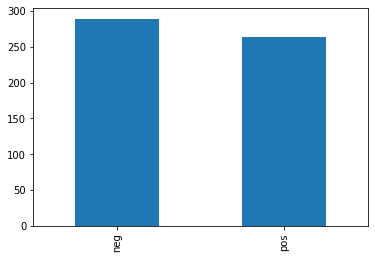

In [74]:
data['sentiment'].value_counts().sort_index().plot.bar()

<AxesSubplot:ylabel='Frequency'>

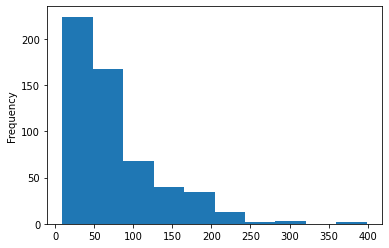

In [75]:
data['Review'].str.len().plot.hist()

# Feature Extraction

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
ngram_vectorizer = CountVectorizer(ngram_range=(1,1))
X = ngram_vectorizer.fit_transform(data.Review)


In [77]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# one hot encoding

In [78]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoded_y=encoder.fit_transform(data.sentiment)

# convert integers to one hot encoded
y_categorical = np_utils.to_categorical(encoded_y)
import numpy as np
y=np.argmax(y_categorical, axis=1)
y[1]

1

In [79]:
y[0:10]

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

# Split data

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20,random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(442, 1669) (442,)
(111, 1669) (111,)


# (Random forest classifier)

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
rfc = RandomForestClassifier(n_estimators=1000,max_depth=20,random_state=0)
rfc.fit(X_train, y_train)
pred_rfc=rfc.predict(X_test)
print("Random forest Accuracy: %.2f"%(metrics.accuracy_score(y_test, pred_rfc)))

Random forest Accuracy: 0.92


In [82]:
from sklearn.metrics import multilabel_confusion_matrix
confusion =multilabel_confusion_matrix(y_test,pred_rfc)
print(confusion)

[[[49  4]
  [ 5 53]]

 [[53  5]
  [ 4 49]]]


<Figure size 720x720 with 0 Axes>

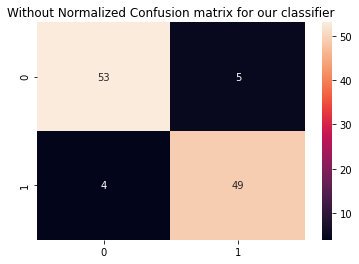

<Figure size 720x720 with 0 Axes>

In [83]:
import seaborn as sn
from sklearn import metrics
import matplotlib.pyplot as plt
confusion=metrics.confusion_matrix(y_test,pred_rfc)
plt.xlabel('true')
plt.ylabel('Predicted')
sn.heatmap(confusion,annot=True)
plt.title('Without Normalized Confusion matrix for our classifier')
plt.figure(figsize=(10,10))

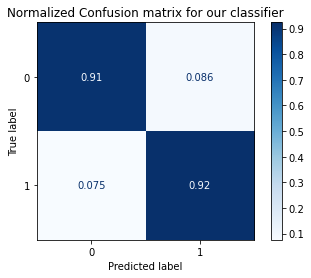

In [84]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
matrix =plot_confusion_matrix(rfc, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Normalized Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        58
           1       0.91      0.92      0.92        53

    accuracy                           0.92       111
   macro avg       0.92      0.92      0.92       111
weighted avg       0.92      0.92      0.92       111



# Extra Trees

In [86]:
from sklearn.ensemble import ExtraTreesClassifier
extra = ExtraTreesClassifier(n_estimators=500, max_depth=20, random_state=0)
extra.fit(X_train,y_train)
pred_extra = extra.predict(X_test)
print("Decision Tree Accuracy: %.2f"%(metrics.accuracy_score(y_test, pred_extra)))

Decision Tree Accuracy: 0.94


In [87]:
from sklearn.metrics import multilabel_confusion_matrix
confusion =multilabel_confusion_matrix(y_test,pred_extra)
print(confusion)

[[[49  4]
  [ 3 55]]

 [[55  3]
  [ 4 49]]]


<Figure size 720x720 with 0 Axes>

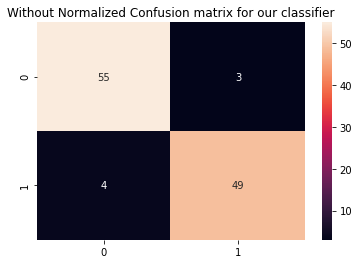

<Figure size 720x720 with 0 Axes>

In [88]:
import seaborn as sn
import matplotlib.pyplot as plt
confusion=metrics.confusion_matrix(y_test,pred_extra)
plt.xlabel('true')
plt.ylabel('Predicted')
sn.heatmap(confusion,annot=True)
plt.title('Without Normalized Confusion matrix for our classifier')
plt.figure(figsize=(10,10))

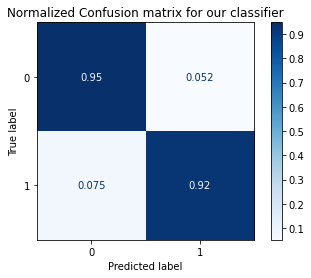

In [89]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
matrix =plot_confusion_matrix(extra, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Normalized Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_extra))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        58
           1       0.94      0.92      0.93        53

    accuracy                           0.94       111
   macro avg       0.94      0.94      0.94       111
weighted avg       0.94      0.94      0.94       111



# Multinomial Naive Bayes¶

In [91]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
pred_mnb=mnb.predict(X_test)
print("MUltinomial Naive Bayes Accuracy: %.2f"%(metrics.accuracy_score(y_test, pred_mnb)))

MUltinomial Naive Bayes Accuracy: 0.93


In [92]:
from sklearn.metrics import multilabel_confusion_matrix
confusion =multilabel_confusion_matrix(y_test,pred_mnb)
print(confusion)

[[[50  3]
  [ 5 53]]

 [[53  5]
  [ 3 50]]]


<Figure size 720x720 with 0 Axes>

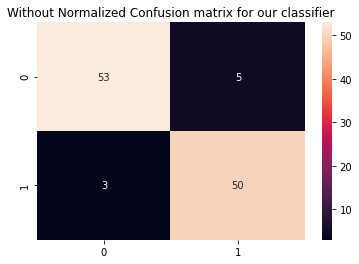

<Figure size 720x720 with 0 Axes>

In [93]:
import seaborn as sn
import matplotlib.pyplot as plt
confusion=metrics.confusion_matrix(y_test,pred_mnb)
plt.xlabel('true')
plt.ylabel('Predicted')
sn.heatmap(confusion,annot=True)
plt.title('Without Normalized Confusion matrix for our classifier')
plt.figure(figsize=(10,10))

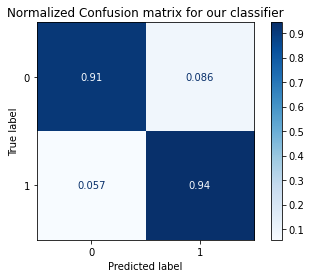

In [94]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
matrix =plot_confusion_matrix(mnb, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Normalized Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_mnb))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        58
           1       0.91      0.94      0.93        53

    accuracy                           0.93       111
   macro avg       0.93      0.93      0.93       111
weighted avg       0.93      0.93      0.93       111



# Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.8)
lr.fit(X_train, y_train)
pred_lr=lr.predict(X_test)
print("Logistic Regression Accuracy: %.2f"%(metrics.accuracy_score(y_test, pred_lr)))

Logistic Regression Accuracy: 0.93


In [97]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,pred_lr))

[[55  3]
 [ 5 48]]


<Figure size 720x720 with 0 Axes>

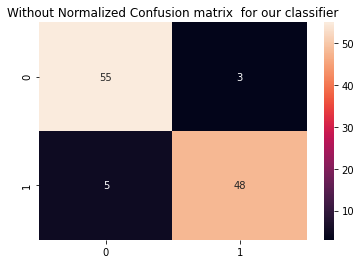

<Figure size 720x720 with 0 Axes>

In [98]:
import seaborn as sn
import matplotlib.pyplot as plt
confusion=metrics.confusion_matrix(y_test,pred_lr)
plt.xlabel('true')
plt.ylabel('Predicted')
sn.heatmap(confusion,annot=True)
plt.title('Without Normalized Confusion matrix  for our classifier')
plt.figure(figsize=(10,10))

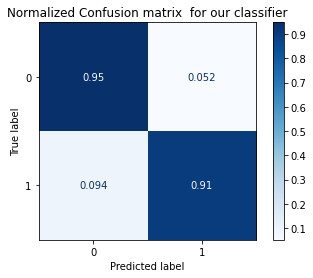

In [99]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
matrix =plot_confusion_matrix(lr, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Normalized Confusion matrix  for our classifier')
plt.show(matrix)
plt.show()

In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        58
           1       0.94      0.91      0.92        53

    accuracy                           0.93       111
   macro avg       0.93      0.93      0.93       111
weighted avg       0.93      0.93      0.93       111



# Stochastic Gradient Descendent

In [101]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
sgd.fit(X_train, y_train)
pred_sgd=sgd.predict(X_test)
print("Stochastic Gradient Accuracy: %.2f"%(metrics.accuracy_score(y_test, pred_sgd)))

Stochastic Gradient Accuracy: 0.88


C:\Users\user\anaconda3\envs\PythonCPU\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [102]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,pred_sgd))

[[54  4]
 [ 9 44]]


<Figure size 720x720 with 0 Axes>

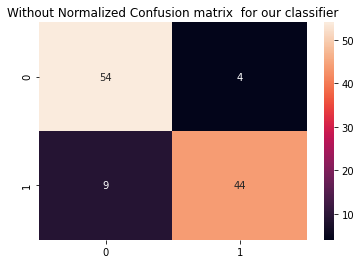

<Figure size 720x720 with 0 Axes>

In [103]:
import seaborn as sn
import matplotlib.pyplot as plt
confusion=metrics.confusion_matrix(y_test,pred_sgd)
plt.xlabel('true')
plt.ylabel('Predicted')
sn.heatmap(confusion,annot=True)
plt.title('Without Normalized Confusion matrix  for our classifier')
plt.figure(figsize=(10,10))

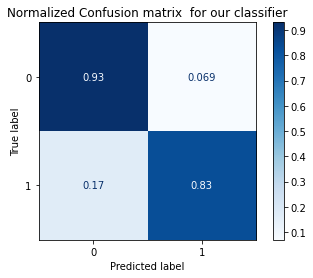

In [104]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
matrix =plot_confusion_matrix(sgd, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Normalized Confusion matrix  for our classifier')
plt.show(matrix)
plt.show()

In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_sgd))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        58
           1       0.92      0.83      0.87        53

    accuracy                           0.88       111
   macro avg       0.89      0.88      0.88       111
weighted avg       0.89      0.88      0.88       111



# RNN LSTM

In [106]:
# Split the sentences into words
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['Review'].values)
X = tokenizer.texts_to_sequences(data['Review'].values)
X = pad_sequences(X)
y = pd.get_dummies(data['sentiment']).values

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)


(442, 59) (442, 2)
(111, 59) (111, 2)


In [108]:
# prepare the RNN model
model = Sequential()
model.add(Embedding(2000, 256, input_length=X_train.shape[1]))
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=True, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.3))
model.add(LSTM(256, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(2, activation='softmax'))
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 59, 256)           512000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 59, 256)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 59, 256)           525312    
_________________________________________________________________
dropout_4 (Dropout)          (None, 59, 256)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 514       
Total params: 1,563,138
Trainable params: 1,563,138
Non-trainable params: 0
____________________________________________

In [109]:
batch_size = 50
epochs = 7

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/7
 - 10s - loss: 0.6909 - accuracy: 0.5158
Epoch 2/7
 - 8s - loss: 0.6861 - accuracy: 0.5385
Epoch 3/7
 - 8s - loss: 0.6603 - accuracy: 0.6176
Epoch 4/7
 - 8s - loss: 0.5767 - accuracy: 0.7262
Epoch 5/7
 - 8s - loss: 0.4059 - accuracy: 0.8100
Epoch 6/7
 - 8s - loss: 0.2481 - accuracy: 0.8982
Epoch 7/7
 - 8s - loss: 0.1768 - accuracy: 0.9389


# Evaluate The Model Loss and Accuracy

In [110]:
predictions = model.predict(X_test)
score = model.evaluate(X_test, y_test)

111/111 [==============================] - 1s 10ms/step


In [111]:
score

[0.4970694705172702, 0.8288288116455078]

# predict

In [112]:
predictions = model.predict(X_test)
predictions =(predictions>0.5)
list(predictions)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.75      0.83        60
           1       0.76      0.92      0.83        51

   micro avg       0.83      0.83      0.83       111
   macro avg       0.84      0.84      0.83       111
weighted avg       0.84      0.83      0.83       111
 samples avg       0.83      0.83      0.83       111



In [113]:
from sklearn.metrics import multilabel_confusion_matrix
confusion =multilabel_confusion_matrix(y_test,predictions)
print(confusion)

[[[47  4]
  [15 45]]

 [[45 15]
  [ 4 47]]]


In [114]:
pos_count,  neg_count = 0, 0
real_pos, real_neg = 0, 0
for i, prediction in enumerate(predictions):
    if np.argmax(prediction)==1:
        pos_count += 1
    
    else:
        neg_count += 1
    
    if np.argmax(y_test[i])==1:
        real_pos += 1
    
    else:
        real_neg +=1

print('Positive predictions:', pos_count)
print('Neutral predictions:', neg_count)
print('Real positive:', real_pos)
print('Real negative:', real_neg)

Positive predictions: 62
Neutral predictions: 49
Real positive: 51
Real negative: 60
